# Ejemplo IMDB

## Importar Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from keras.datasets import imdb

# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# si se intenta cargar directamete puede salir un error de pickle, por eso...

Using TensorFlow backend.


In [3]:
# ...se usa numpy

import numpy as np
# guarda np.load
np_load_old = np.load

# modifica los parametros por defecto de np.load
# con allow_pickle=True
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# se cargan los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# se devuelve np.load a su estado original
np.load = np_load_old

In [4]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
train_labels[0]

1

In [6]:
# los datos estan restringidos a 10000 palabras
max([max(sequence) for sequence in train_data])

9999

In [7]:
# se mapean las palabras con un numero entero
word_index = imdb.get_word_index()

# se da la vuelta al diccionario
reverse_word_index = dict(
     [(value, key) for (key, value) in word_index.items()])

# se decodifica el review, i-3 porque 
# 0=padding, 1=inicio de la secuencia, 3=desconocido (indices)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## Preparando Data

In [8]:
# se crea un matriz de todo ceros

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.  # indice a uno
    return results

In [9]:
# train-test

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
# se vectorizan las etiquetas

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Modelo

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# se compila
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# compilado configurando optimizador
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# compilado usando metricas y perdidas custom
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validacion

In [15]:
# set de validacion

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Entrenamiento

In [16]:
# epocas
epochs=20

# compilacion
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


# entrenamiento guardado en historial
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3796 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.3004 - acc: 0.9048 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3086 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3165 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.0980 - acc: 0.9708 - val_loss: 0.3127 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plots entrenamiento y validacion

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

# plot de perdida
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epochs + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

<Figure size 640x480 with 1 Axes>

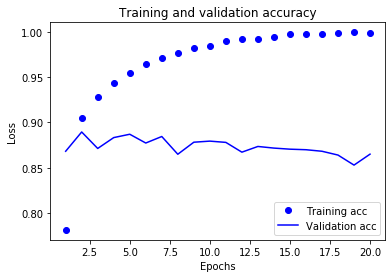

In [19]:
# plot de acierto
#plt.clf() # limpia la figura

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

## Reentrenando para 4 epocas

In [20]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.4738 - acc: 0.8219
Epoch 2/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2673 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2033 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


In [21]:
results

[0.3113499817943573, 0.87596]

In [22]:
print ('Con este modelo tan simple se consigue un acierto del {:.3f}%'.format(100*results[1]))

Con este modelo tan simple se consigue un acierto del 87.59599999999999%


## Haciendo predicciones

In [23]:
model.predict(x_test)

array([[0.16101953],
       [0.99983793],
       [0.40027568],
       ...,
       [0.08090654],
       [0.04873252],
       [0.45444986]], dtype=float32)